In [8]:
# Plot with lables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_movement_data(csv_file_path, ignore_start=0, ignore_end=0):
    # Check if file exists
    if not os.path.isfile(csv_file_path):
        print(f"No such file: {csv_file_path}")
        return

    # Read the data from the CSV file
    data = pd.read_csv(csv_file_path, delimiter=",")

    # Ignore specified amount of frames at the beginning and/or end
    data = data[ignore_start : -ignore_end or None]

    # Check if data is empty
    if data.empty:
        print(f"No data to plot for {csv_file_path}")
        return

    # Calculate the average hip height
    data["Average_Hip_Height"] = (data["Left hip_y"] + data["Right hip_y"]) / 2

    # Define custom color mapping for movement types
    custom_color_mapping = {
        "Pause": "orange",
        "Ascending": "green",
        "Descending": "red",
        "Transition": "yellow",
        "Unknown": "grey",
    }

    # Plotting the data
    plt.figure(figsize=(15, 6))
    sns.scatterplot(
        x=data["Timestamp"],
        y=-data["Average_Hip_Height"],
        hue=data["Label"],
        palette=custom_color_mapping,
    )

    # Extract filename from the csv_file_path
    filename = csv_file_path.split("/")[-1]

    plt.title(f"Average Hip Height with Movement Labels for {filename}")
    plt.xlabel("Timestamp")
    plt.ylabel("Average Hip Height")
    plt.legend(title="Movement Type")

    # Increase the number of x-axis ticks for better granularity
    plt.xticks(np.arange(min(data["Timestamp"]), max(data["Timestamp"]) + 1, 50.0))

    # Add grid for better visualization
    plt.grid(True)

    plt.show()

In [9]:
#remove unneeded Frames
def remove_ignored_frames(csv_file_path, ignore_start=0, ignore_end=0):
    # Read the data from the CSV file
    data = pd.read_csv(csv_file_path, delimiter=',')

    # Ignore specified amount of frames at the beginning and/or end
    data = data[ignore_start:-ignore_end or None]

    # Save the modified data back to the CSV file
    data.to_csv(csv_file_path, index=False)

# Usage
csv_file_path = 'tracking_data/Tracking_video08_labled.csv'  # Replace with your CSV file path
ignore_start = 0# Number of frames to ignore at the start
ignore_end = 0  # Number of frames to ignore at the end

remove_ignored_frames(csv_file_path, ignore_start, ignore_end)

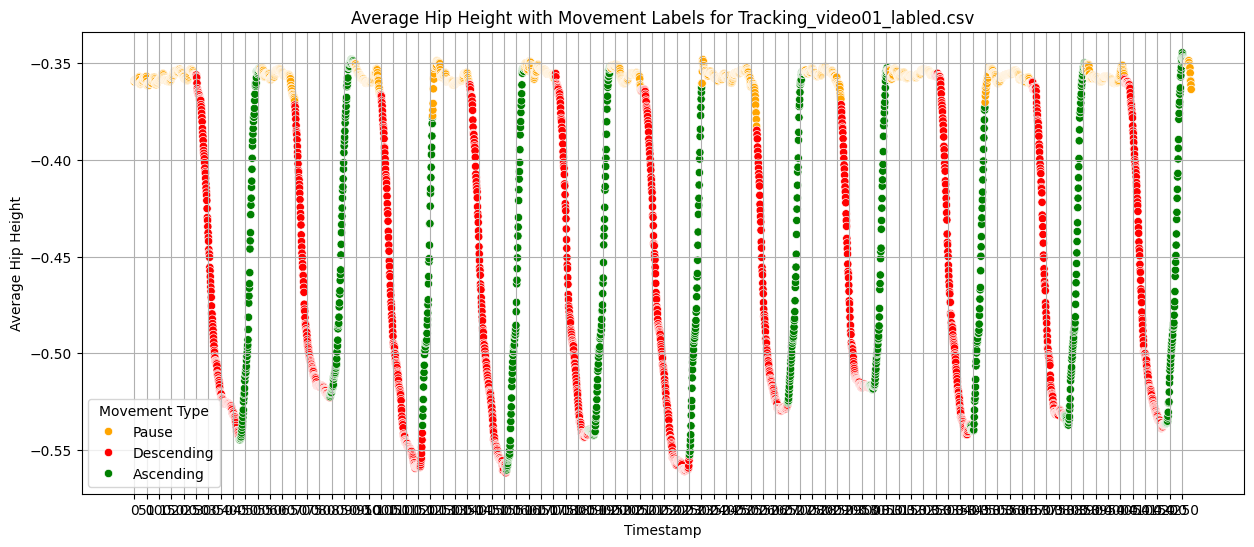

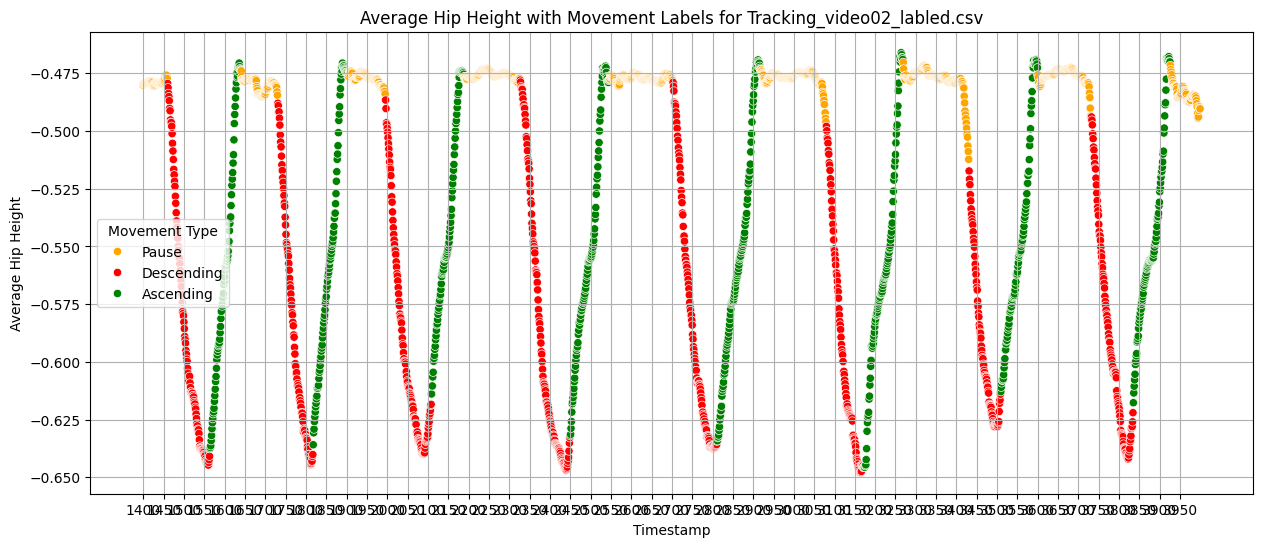

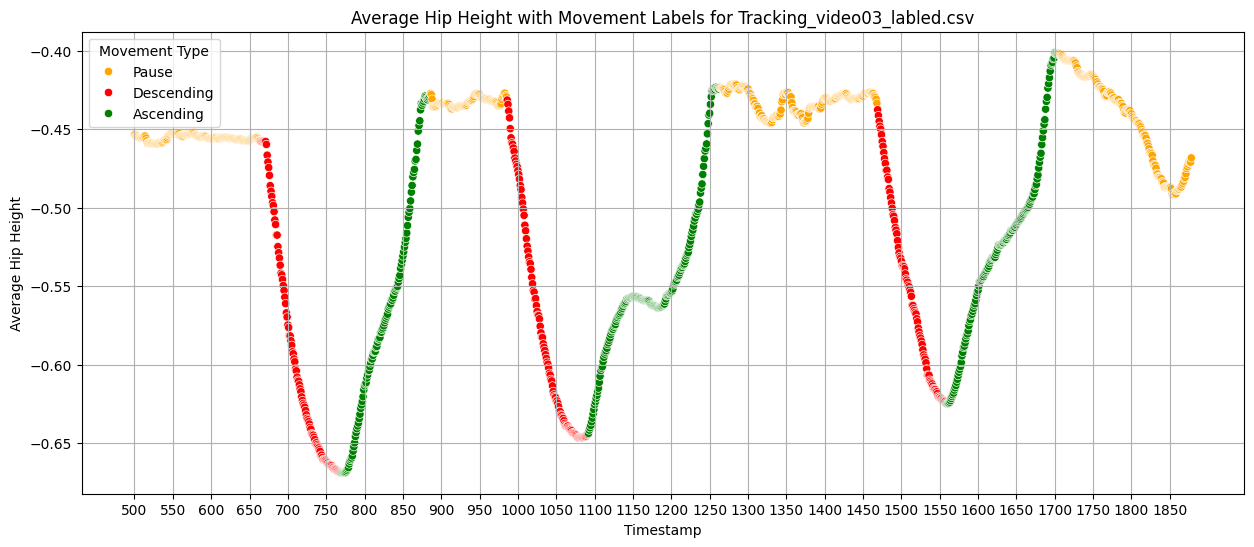

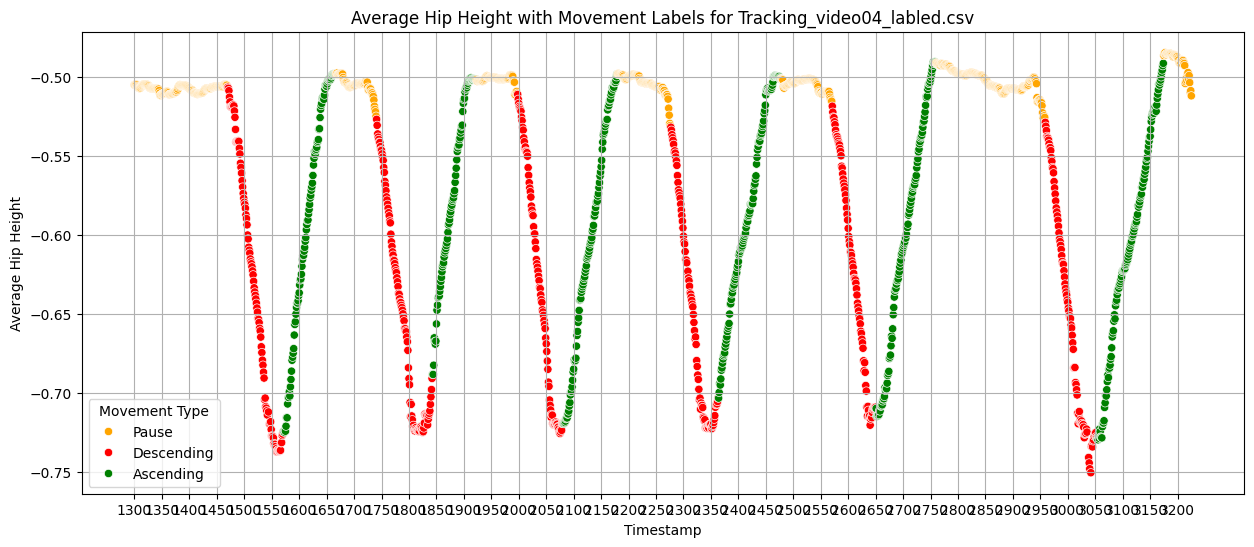

No such file: labled_data/Tracking_video05_labled.csv


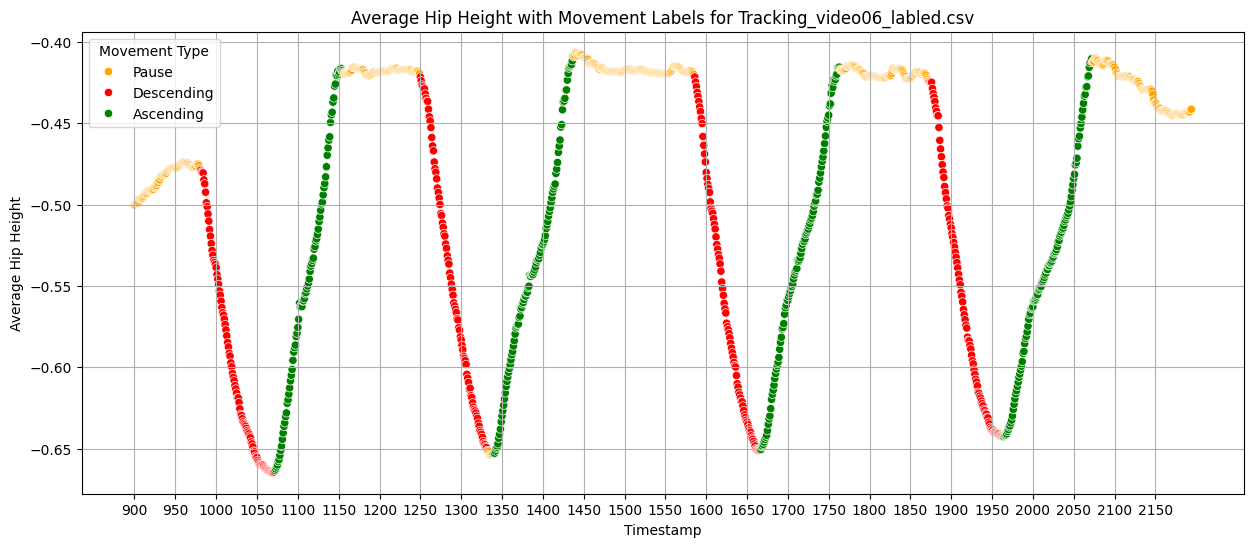

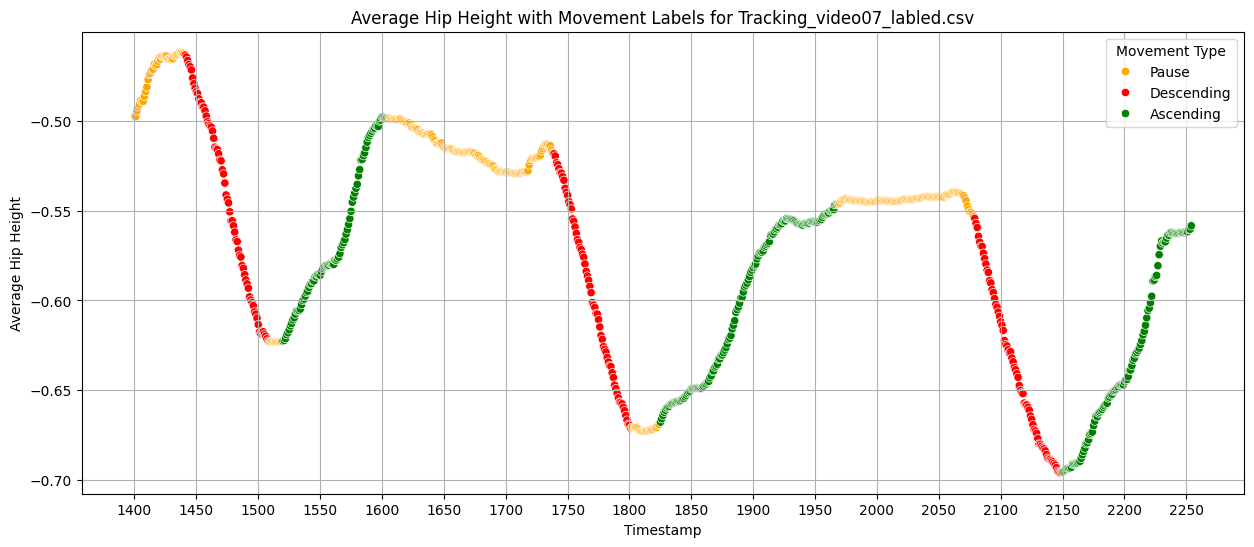

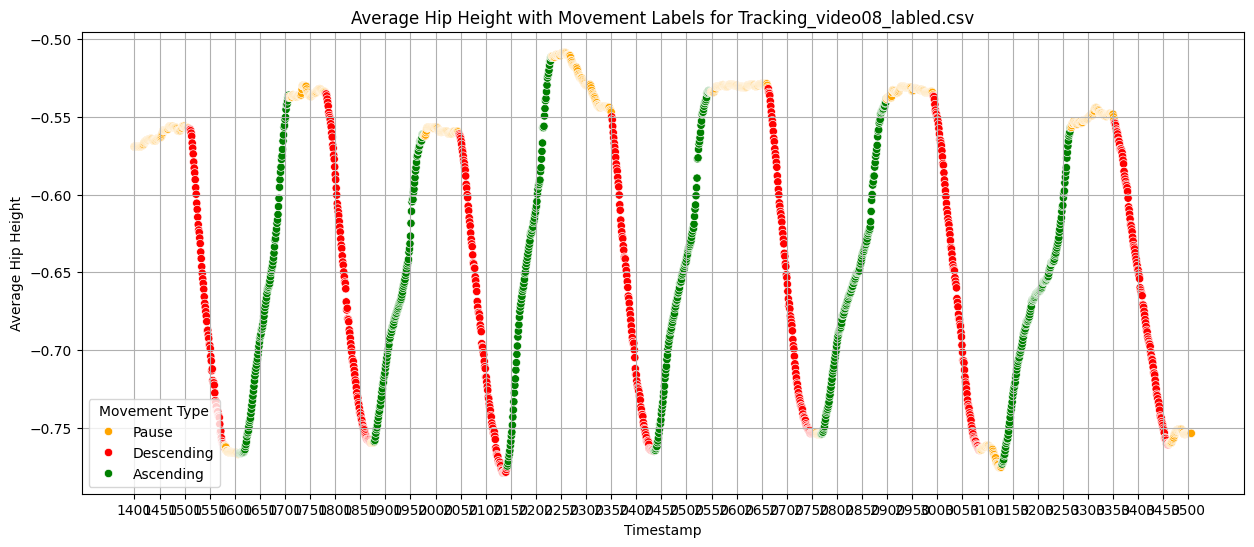

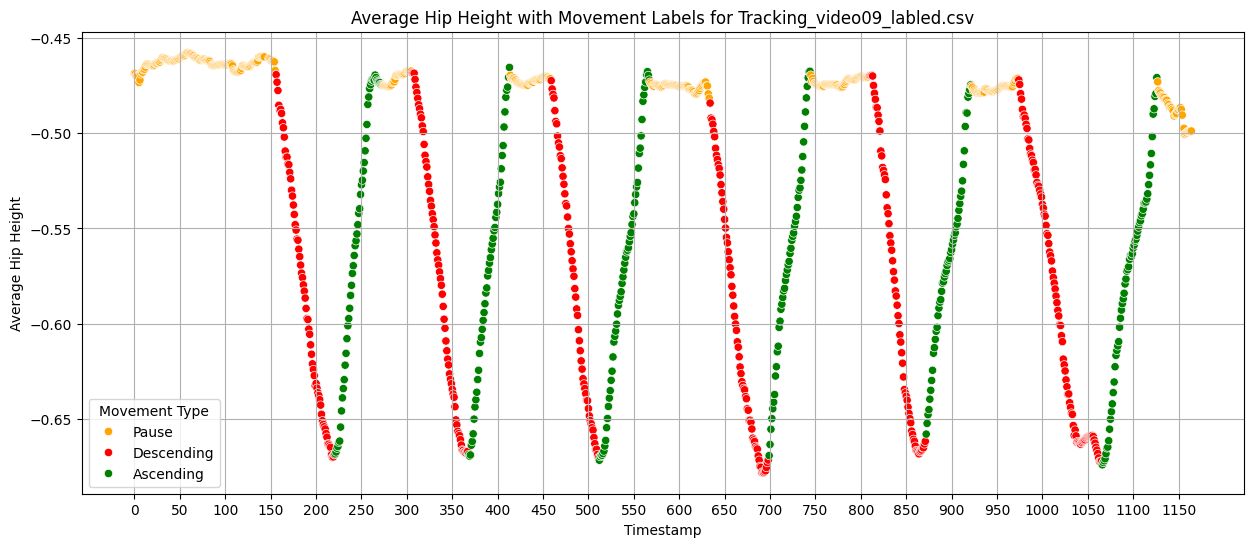

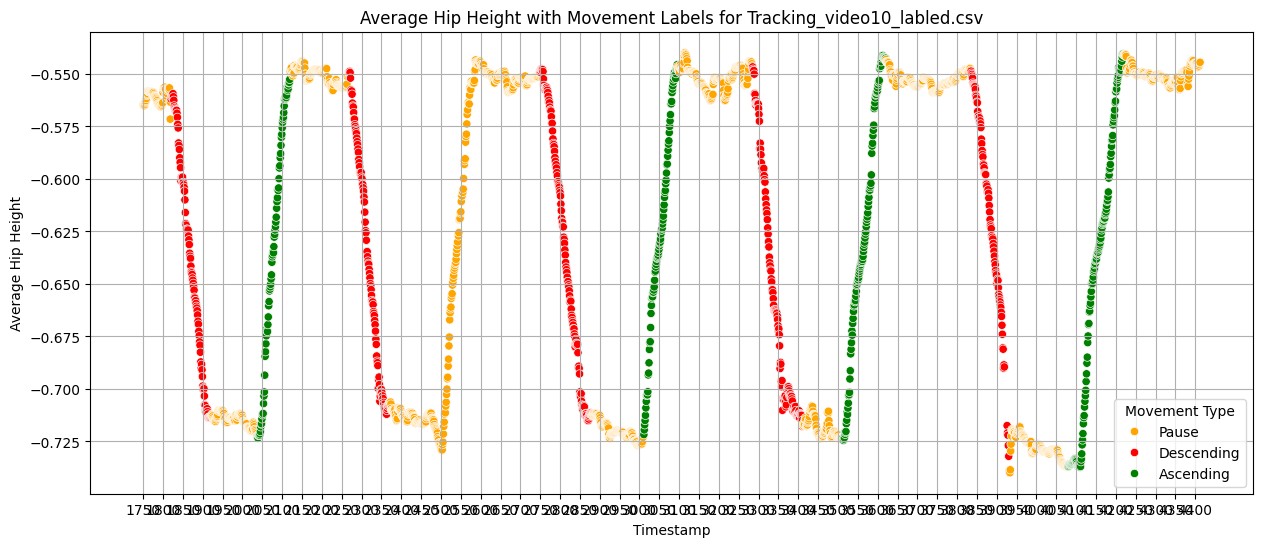

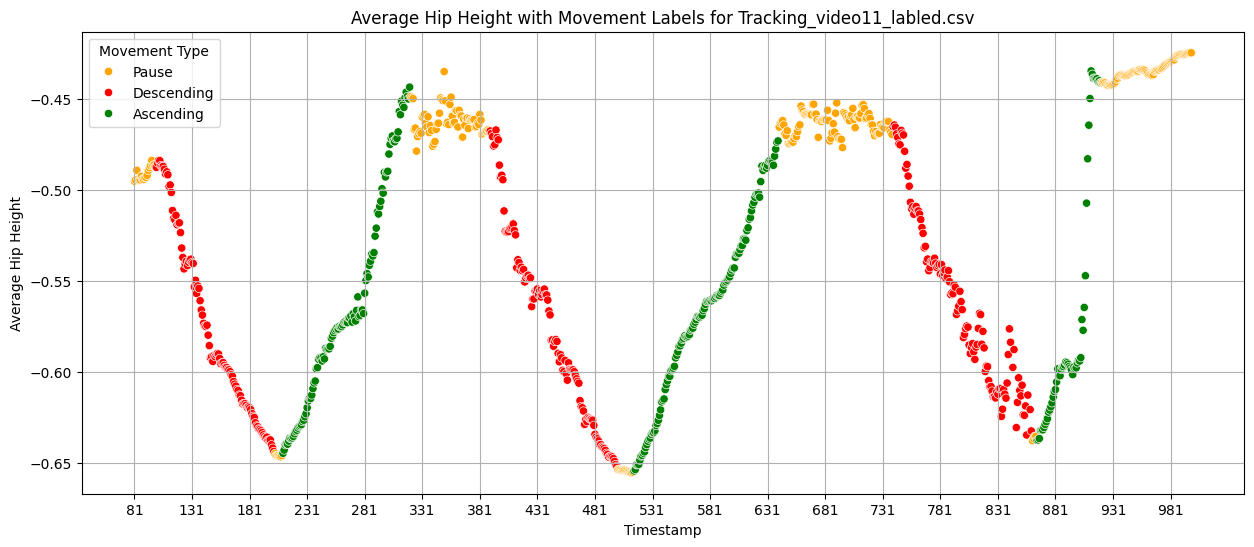

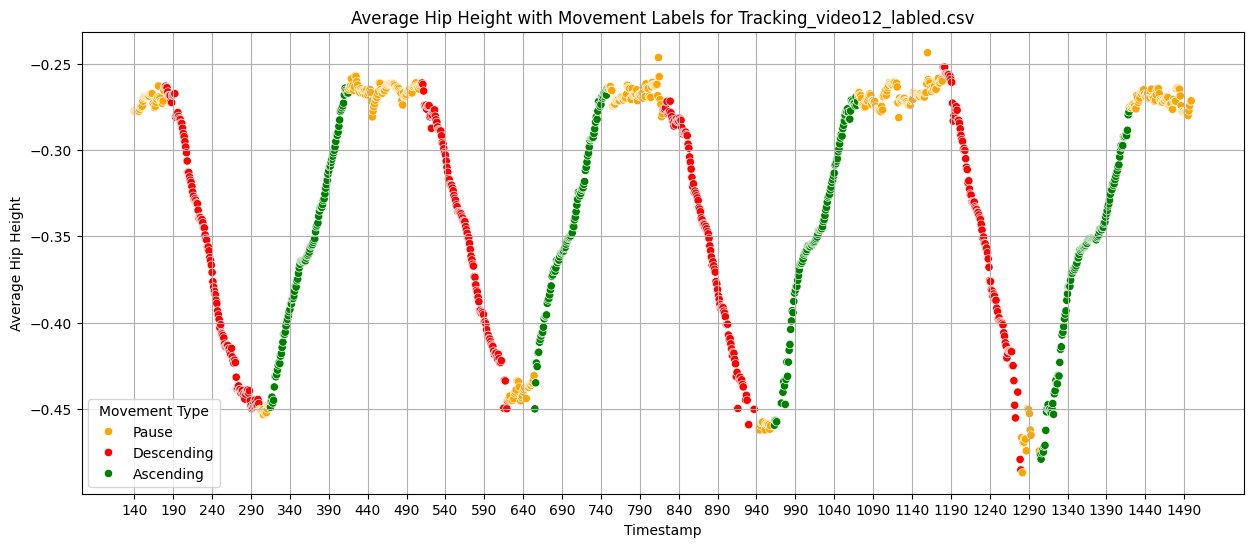

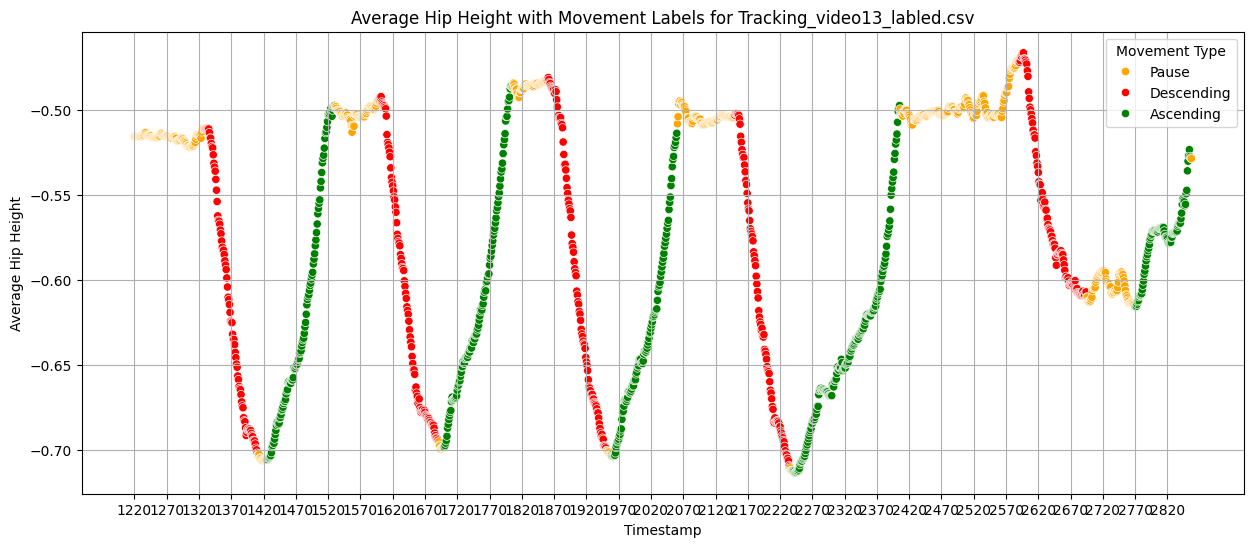

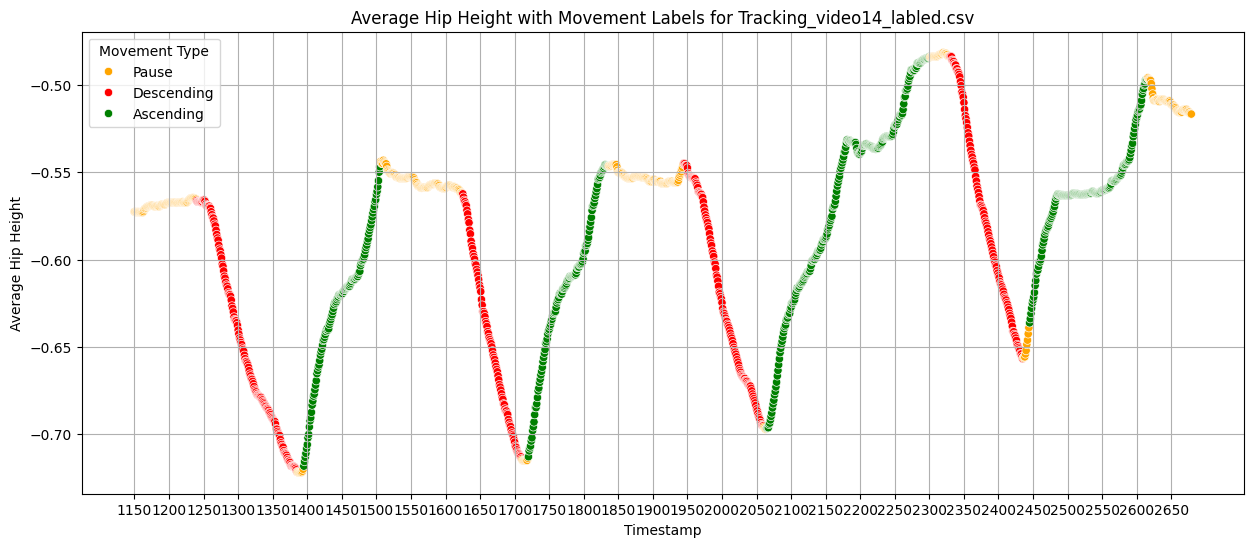

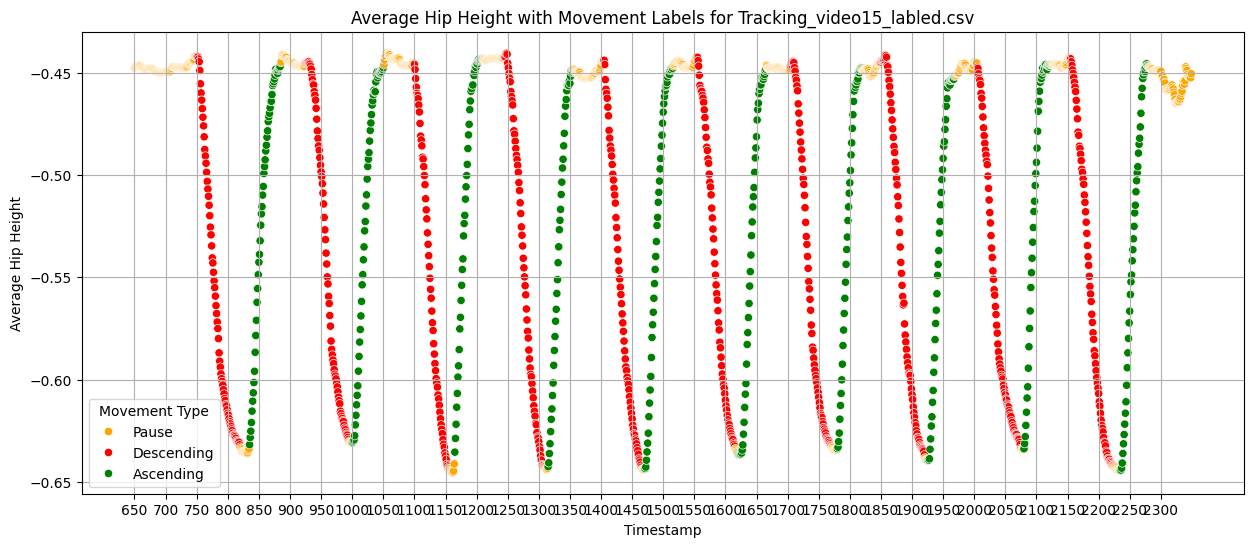

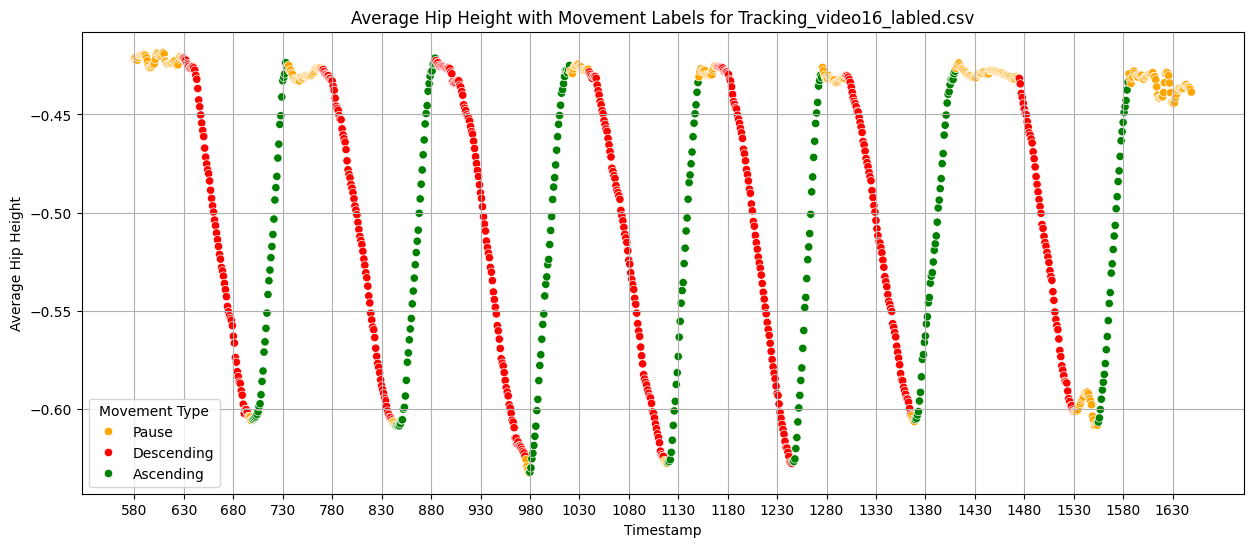

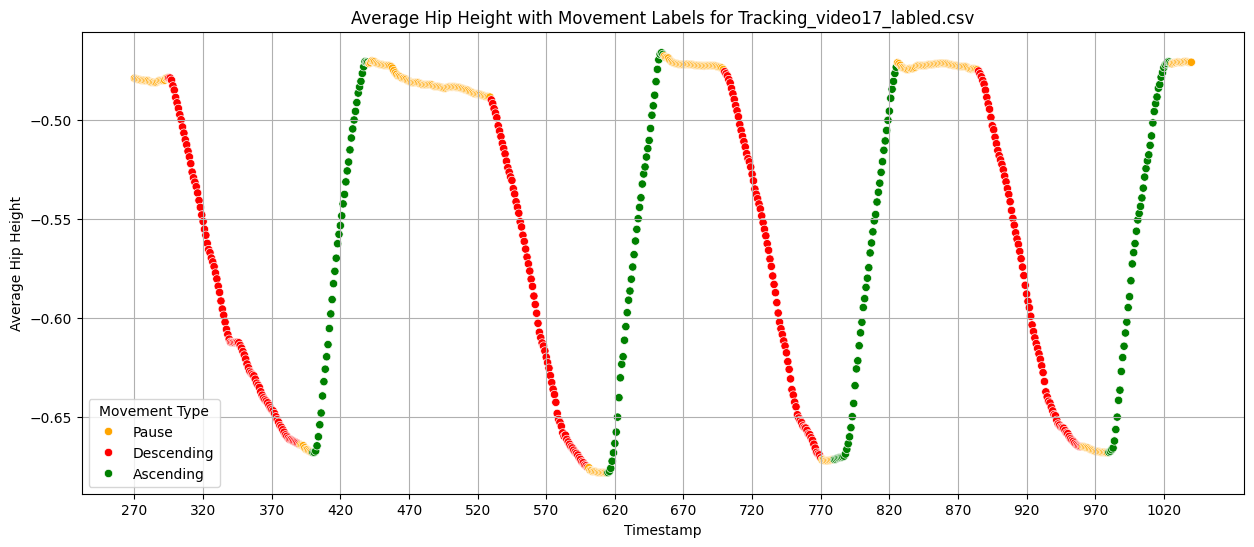

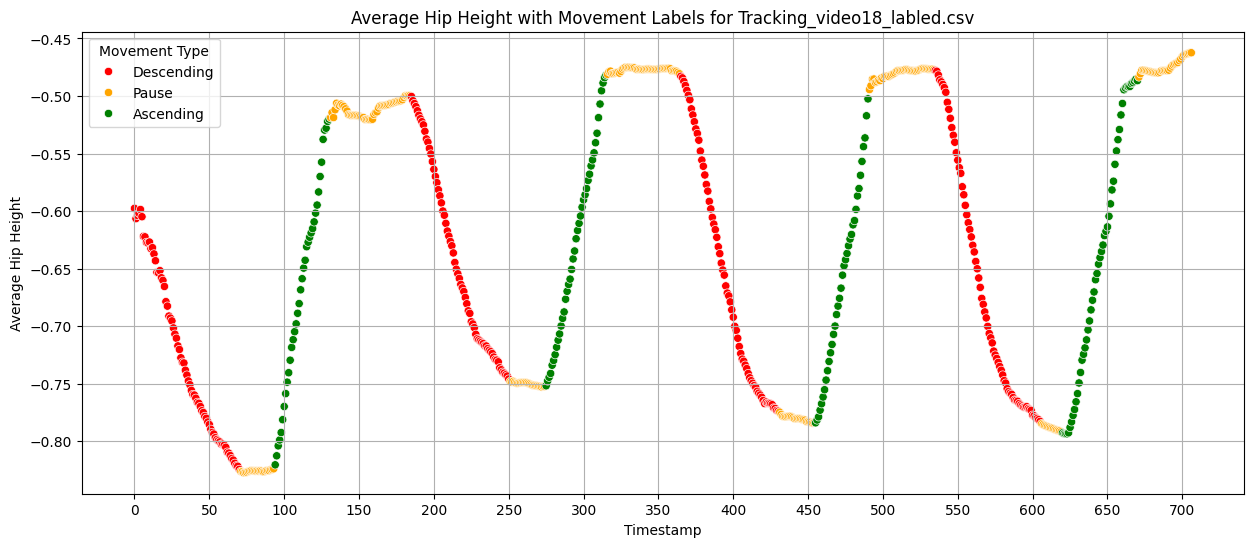

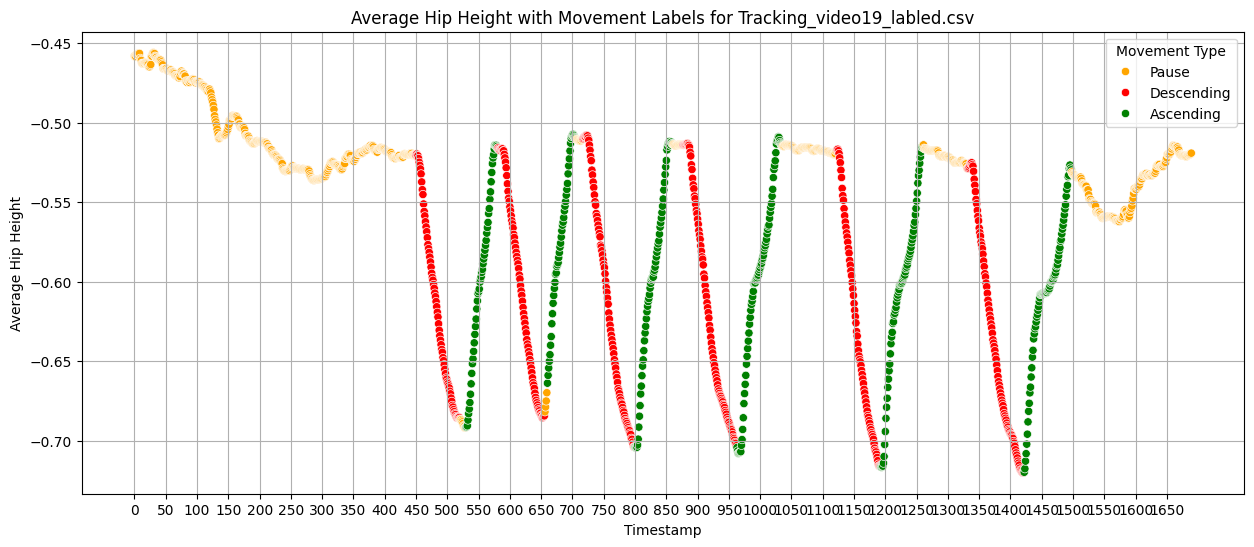

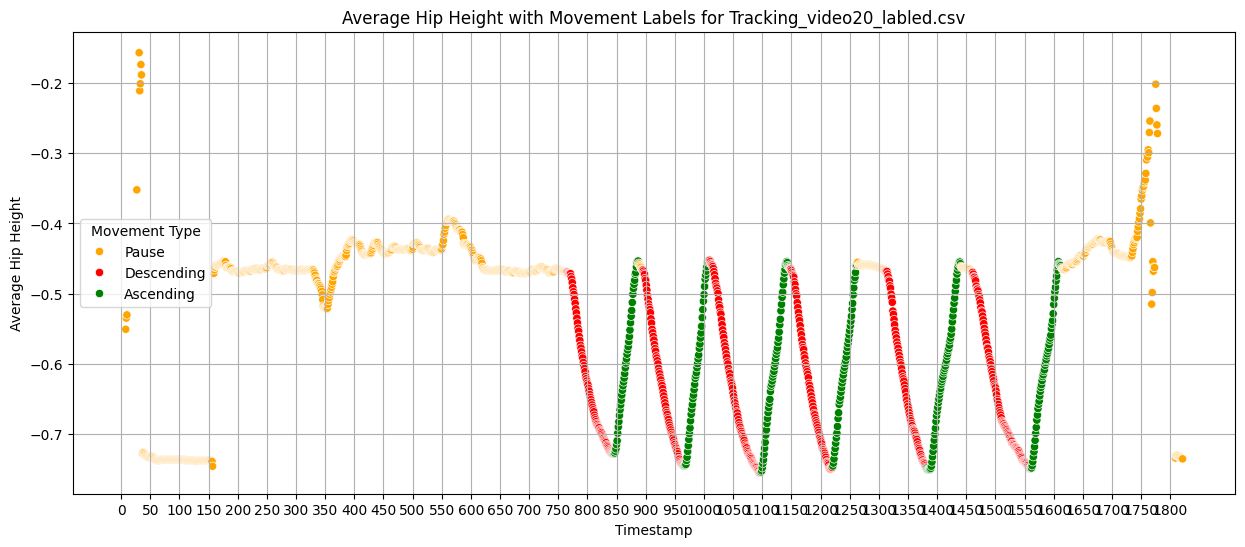

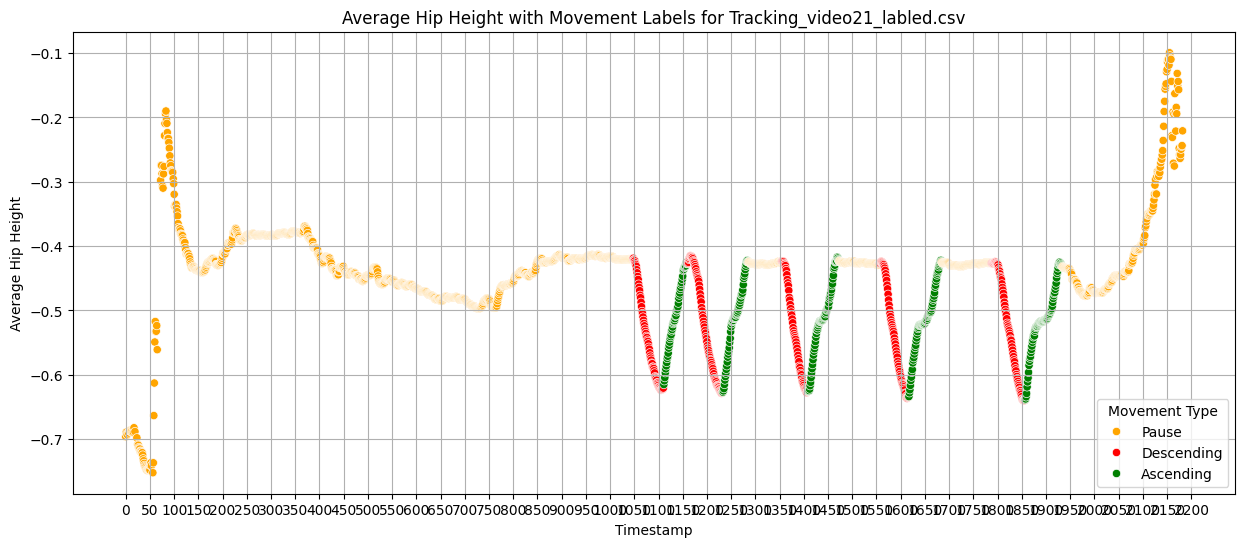

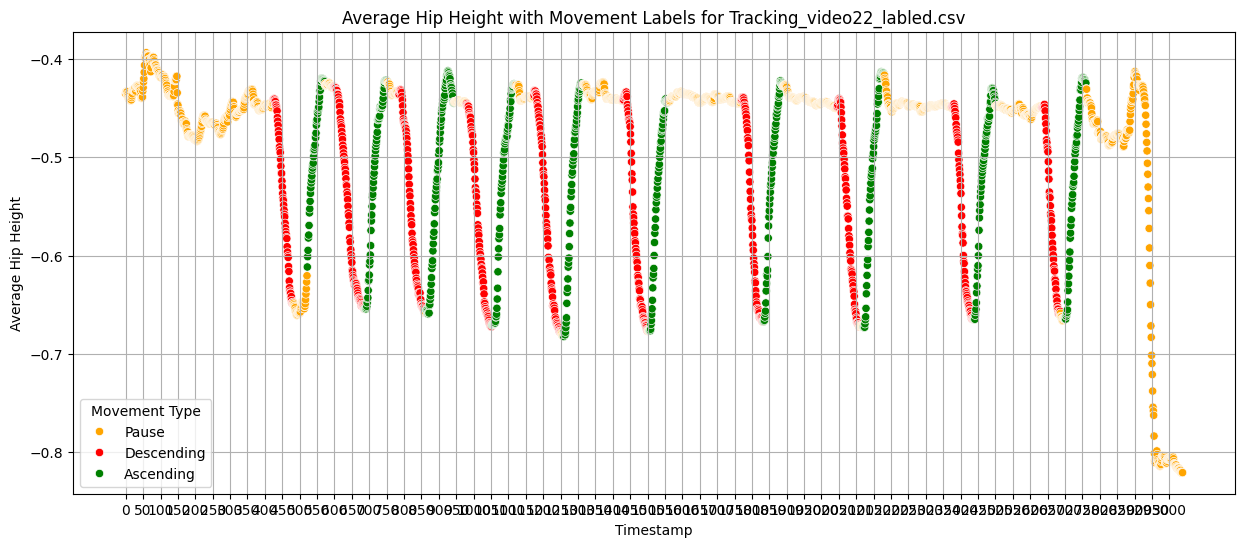

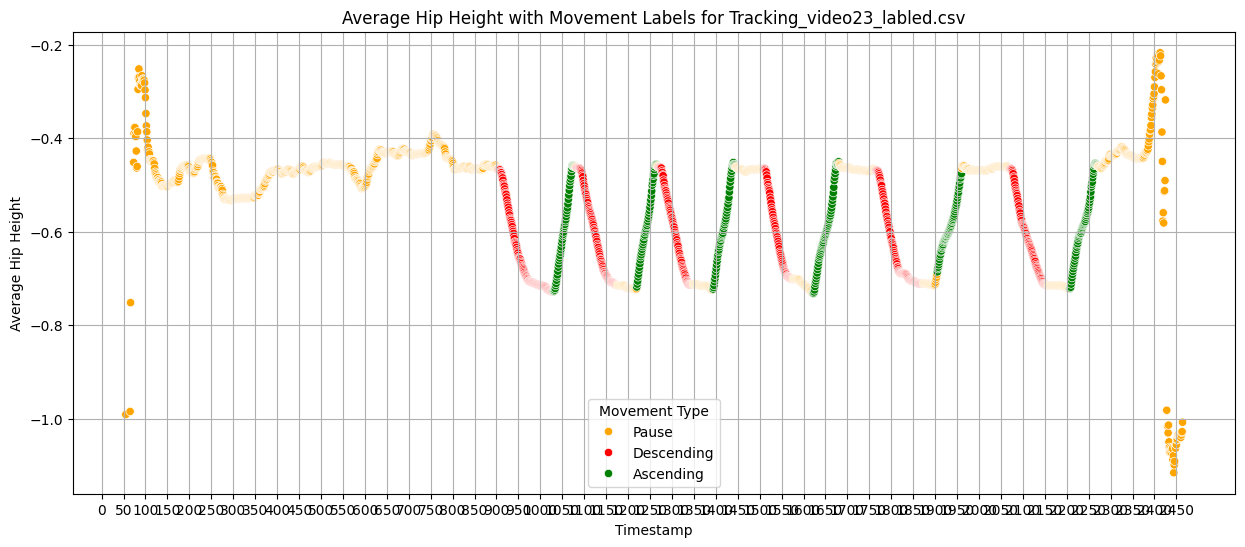

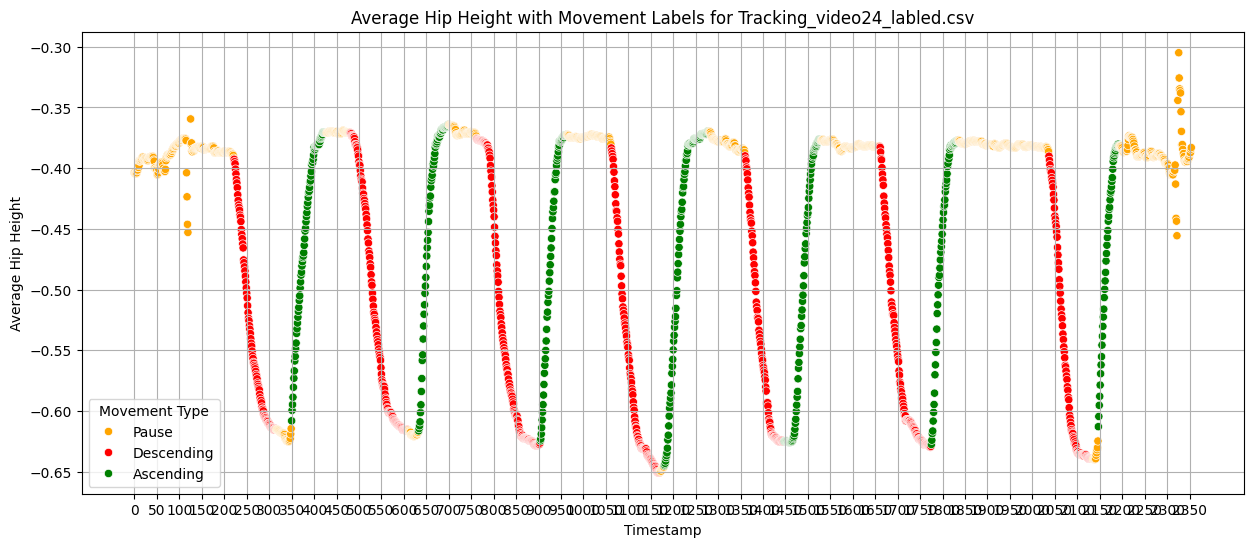

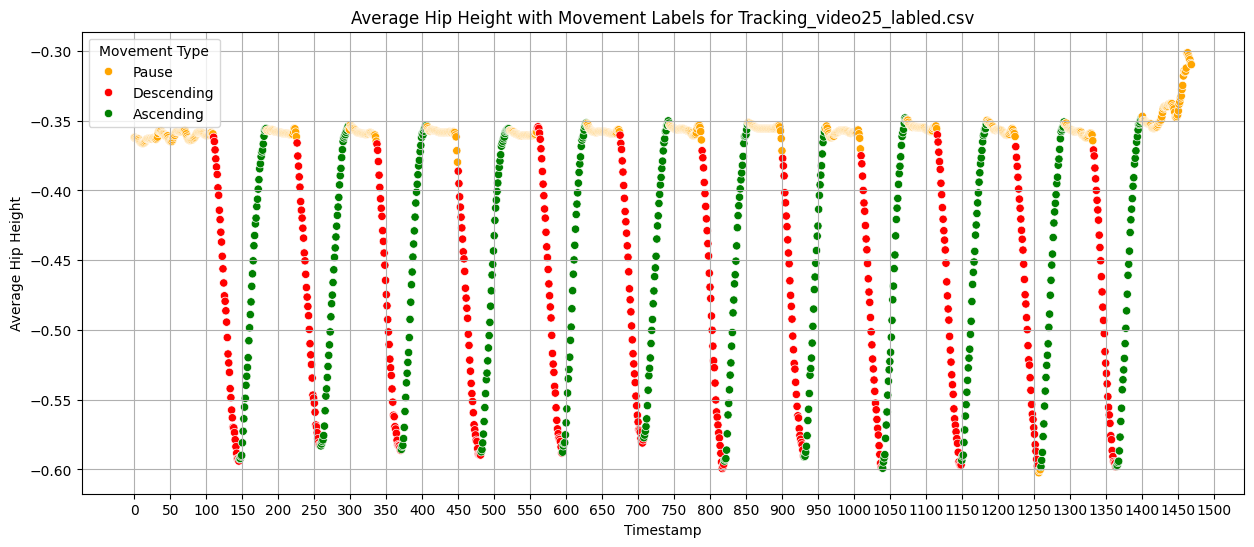

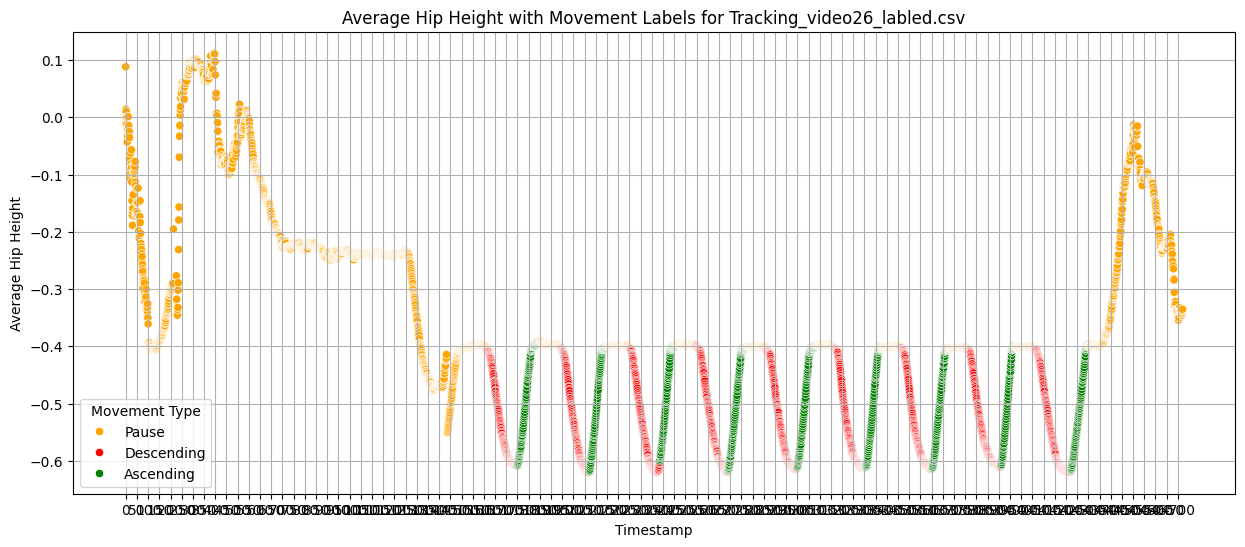

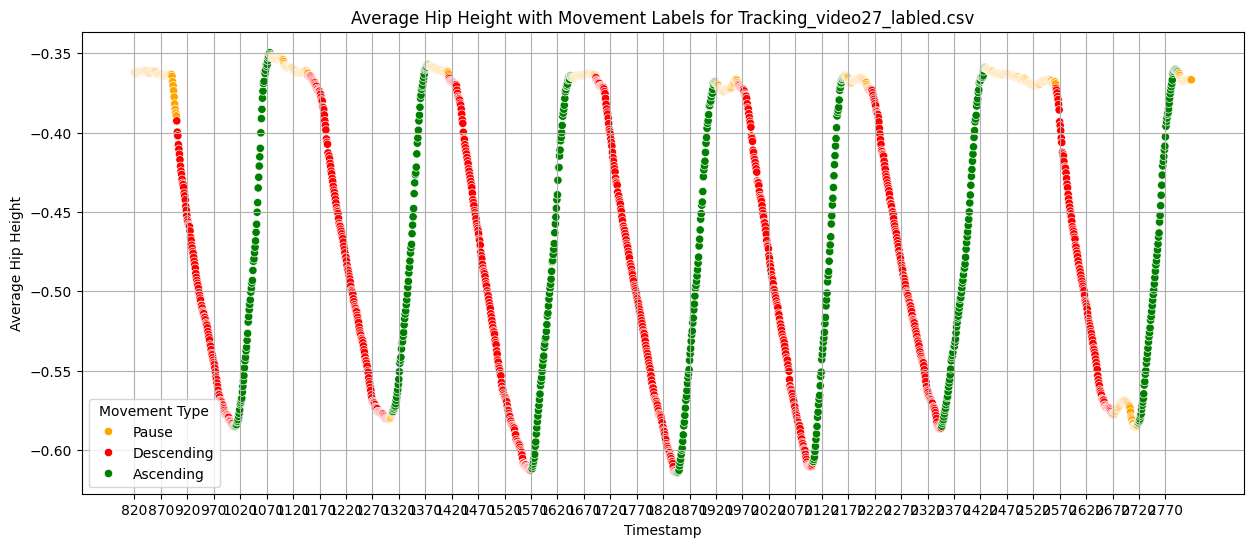

In [10]:
# Define the base file path
base_file_path = "labled_data/Tracking_video"

# Define the range of file numbers
file_numbers = range(1, 28)

# Iterate over the file numbers
for file_number in file_numbers:
    # Format the file number to have leading zeros
    formatted_file_number = str(file_number).zfill(2)

    # Construct the file path
    csv_file_path = f"{base_file_path}{formatted_file_number}_labled.csv"

    # Call the plot_movement_data function
    plot_movement_data(csv_file_path, ignore_start, ignore_end)